In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step#1 : Red in our CVS
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
# Step #2 go through all EDA 

In [5]:
# Step# 3 divide data X,y
X = df.drop('sales',axis=1)
y = df['sales']

In [6]:
# Step#4 : create polynomial transformer
from sklearn.preprocessing import PolynomialFeatures
polynomial_convertor = PolynomialFeatures(degree=3 , include_bias=False)
poly_X = polynomial_convertor.fit_transform(X)

In [7]:
poly_X[0]

array([2.30100000e+02, 3.78000000e+01, 6.92000000e+01, 5.29460100e+04,
       8.69778000e+03, 1.59229200e+04, 1.42884000e+03, 2.61576000e+03,
       4.78864000e+03, 1.21828769e+07, 2.00135918e+06, 3.66386389e+06,
       3.28776084e+05, 6.01886376e+05, 1.10186606e+06, 5.40101520e+04,
       9.88757280e+04, 1.81010592e+05, 3.31373888e+05])

In [ ]:
# Notice : after polynomial converting for our data frame we got different units of our values in X features
# so we need to scale and see how that will help us.

In [8]:
# Step#5 : train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.3, random_state=101)

In [9]:
# Step#6 : based on Notice of variance of data units after polynomial conversion so 
# ==> we need to scale
from sklearn.preprocessing import StandardScaler

In [ ]:
help(StandardScaler)

In [11]:
scaler = StandardScaler()
# WE FIT  ON TRAINING DATA NOT TESTING DATA
scaler.fit(X_train)
X_train = scaler.transform(X_train) # or : #X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
poly_X[0]

array([2.30100000e+02, 3.78000000e+01, 6.92000000e+01, 5.29460100e+04,
       8.69778000e+03, 1.59229200e+04, 1.42884000e+03, 2.61576000e+03,
       4.78864000e+03, 1.21828769e+07, 2.00135918e+06, 3.66386389e+06,
       3.28776084e+05, 6.01886376e+05, 1.10186606e+06, 5.40101520e+04,
       9.88757280e+04, 1.81010592e+05, 3.31373888e+05])

In [13]:
X_train[0]

array([ 0.49300171, -0.33994238,  1.61586707,  0.28407363, -0.02568776,
        1.49677566, -0.59023161,  0.41659155,  1.6137853 ,  0.08057172,
       -0.05392229,  1.01524393, -0.36986163,  0.52457967,  1.48737034,
       -0.66096022, -0.16360242,  0.54694754,  1.37075536])

In [14]:
# Step#7 : Train our model with LiR
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [15]:
model.coef_

array([  7.18845622,   0.46512164,   0.26440021, -10.37072174,
         5.11723059,  -1.73451567,  -1.29762784,   0.8048698 ,
         0.45804867,   4.96674694,  -1.52605419,   1.50990248,
         0.38607921,  -0.32775826,   0.01138305,   0.74094852,
        -0.32771835,  -0.24949952,  -0.28434437])

In [16]:
# Step#8 : Validate our model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred = model.predict(X_test)

In [17]:
MAE = mean_absolute_error(y_true=y_test,y_pred=y_pred)
MAE

0.4127516085297508

In [18]:
MSE = mean_squared_error(y_true=y_test,y_pred=y_pred)

In [19]:
RMSE = np.sqrt(MSE)
RMSE

0.5803286825159616

In [20]:
r2_score = r2_score(y_true=y_test,y_pred=y_pred)

In [21]:
r2_score

0.9880710036582333

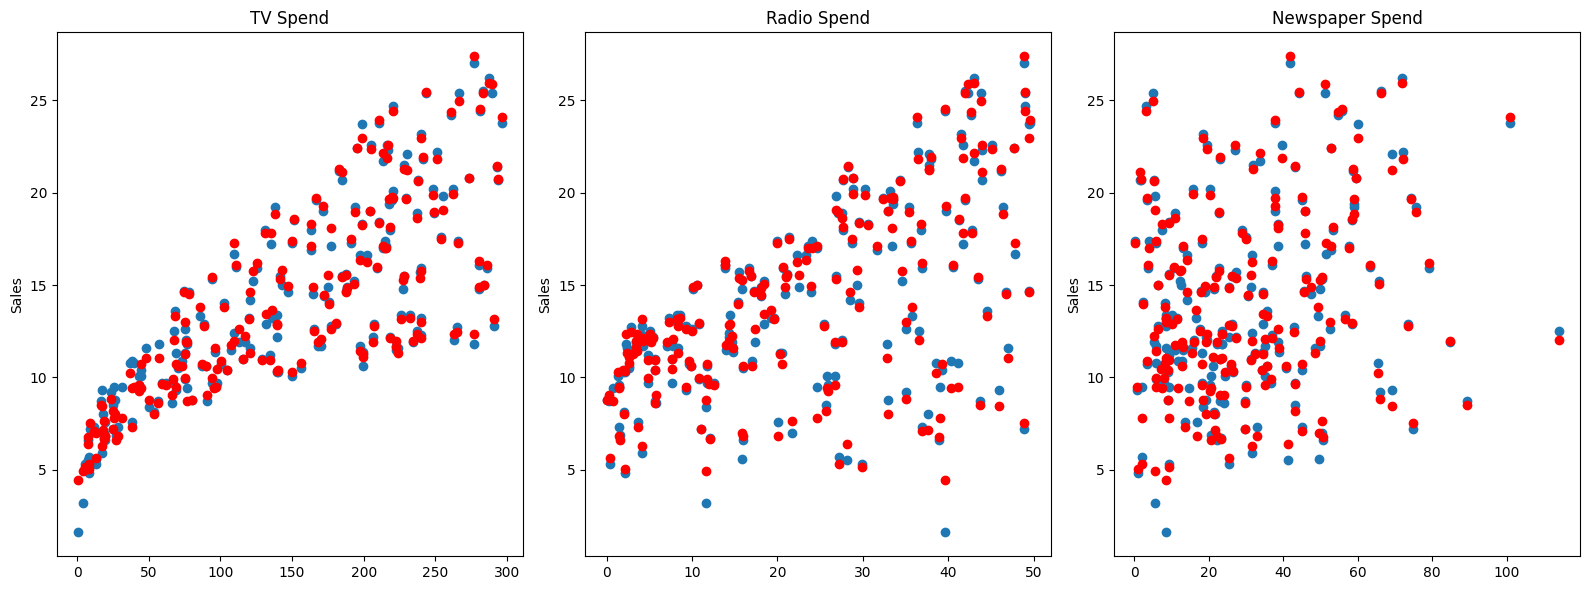

In [22]:
scaled_X = scaler.transform(poly_X)
y_hat = model.predict(scaled_X)
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();